In [5]:
import pandas as pd
import numpy as np
import os
import subprocess
import time

#=========
# CARGA DE DATOS
#=========
data_158 = pd.read_excel("C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\ventas_158.xlsx")
data_158.head()
meta = pd.read_excel("C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\Datos\\Meta.xlsx")
meta.head()

#=========
# LIMPIEZA DE DATOS
#=========
# Solo traigame las columnas C.O. , Fecha , Desc. item , Cantidad inv, Valor subtotal local , Nombre vendedor , Desc. condición de pago, MARCA, FAMILIA. Las demas columnas eliminarlas del data frame
data_158 = data_158[['C.O.', 'Fecha', 'Desc. item', 'Lista de precios', 'Cantidad inv.', 'Valor subtotal local', 'Nombre vendedor', 'Desc. condición de pago', 'MARCA','FAMILIA']]
# Eliminar las filas que tengan: '001 - PROV VARIOS', '123 - SAME', '125 LA PREVISORA'. '126 - SEGUROS DEL ESTADO', '127 - LA OFRENDA', '135 - SBS SEGUROS' Y VACIAS en la colimna MARCA
data_158 = data_158[~data_158['FAMILIA'].isin(['008 - Seguros y servicios', '011 - Sin Familia','999 - VARIOS', '007 - Movilidad (motos, bicis, automóvil)', '009 - DEPORTES'])]
#eliminar de la columnna lista de precios los item CAM
data_158 = data_158[~data_158['Lista de precios'].isin(['CAM'])]
# Eliminar fila Gran total
data_158 = data_158[data_158['C.O.'] != 'Gran total']
# Cambiar el C.O. a Tienda , Desc. item a Item , Valor subtotal local a Valor subtotal , Desc. condición de pago a Lineas de Venta , MARCA a Marca
data_158 = data_158.rename(columns={'C.O.': 'Tienda', 'Desc. item': 'Item', 'Valor subtotal local': 'Valor subtotal', 'Desc. condición de pago': 'Linea de Venta', 'MARCA': 'Marca', 'FAMILIA': 'Familia'})
# Eliminar '001 - PROV VARIOS' de la columna Marca
data_158 = data_158[~data_158['Marca'].isin(['001 - PROV VARIOS'])]
data_158['Fecha'] = pd.to_datetime(data_158['Fecha'])

#=========
# EXPORTA DATAFRAME PARA POWER BI
#=========
data_158.to_excel(r"C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\Datos\\Datos.xlsx", index=False)


In [6]:
# Ruta a Power BI Desktop
#powerbi_path = r"C:\\Program Files\\Microsoft Power BI Desktop\\bin\\PBIDesktop.exe"

# Ruta al archivo PBIX
#archivo_pbix = r"C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\Ventas_158.pbix"

# Abre Power BI
#subprocess.Popen([powerbi_path, archivo_pbix])
#time.sleep(30)  # Espera a que abra


# VENTAS POR LINEA DE VENTA
# CONTADO: Sumar Valor subtotal si Linea de venta es CONTADO y Nombre Vendedor es diferente a VENTAS ADMINISTRACION
ventas_contado = data_158[(data_158['Linea de Venta'] == 'CONTADO') & (data_158['Nombre vendedor'] != 'VENTAS  ADMINISTRACION')]['Valor subtotal'].sum()
print(f"Ventas Contado: {ventas_contado}")
# CREDITO: Sumar Valor subtotal si Linea de venta es CREDITO
ventas_credito = data_158[(data_158['Linea de Venta'] == 'CREDITO 1 MES')]['Valor subtotal'].sum()
print(f"Ventas Credito: {ventas_credito}")
# CONTADO MAYORISTA: Sumar Valor subtotal si Linea de venta es CONTADO y Nombre Vendedor es VENTAS ADMINISTRACION
ventas_contado_mayorista = data_158[(data_158['Linea de Venta'] == 'CONTADO') & (data_158['Nombre vendedor'] == 'VENTAS  ADMINISTRACION')]['Valor subtotal'].sum()
print(f"Ventas Contado Mayorista: {ventas_contado_mayorista}")
# TOTAL VENTAS
total_ventas = ventas_contado + ventas_credito + ventas_contado_mayorista
print(f"Total Ventas: {total_ventas}")

# KPI DE VENTAS % AVANCES
# AVANCE VENTAS CONTADO % = (VENTAS CONTADO / META VENTAS CONTADO) * 100
avance_contado = (ventas_contado / meta.loc[meta['Linea de venta'] == 'CONTADO', 'Meta'].values[0]) * 100
print(f"Avance Ventas Contado %: {avance_contado:.2f}%")
# AVANCE VENTAS CREDITO % = (VENTAS CREDITO / META VENTAS CREDITO) * 100
avance_credito = (ventas_credito / meta.loc[meta['Linea de venta'] == 'CREDITO 1 MES', 'Meta'].values[0]) * 100
print(f"Avance Ventas Credito %: {avance_credito:.2f}%")
# AVANCE VENTAS CONTADO MAYORISTA % = (VENTAS CONTADO MAYORISTA / META VENTAS CONTADO MAYORISTA) * 100
avance_contado_mayorista = (ventas_contado_mayorista / meta.loc[meta['Linea de venta'] == 'CONTADO MAYORISTA', 'Meta'].values[0]) * 100
print(f"Avance Ventas Contado Mayorista %: {avance_contado_mayorista:.2f}%")
# AVANCE TOTAL VENTAS % = (TOTAL VENTAS / META TOTAL VENTAS) * 100
avance_total = total_ventas / meta['Meta'].sum() * 100
print(f"Total Ventas: {avance_total:.2f}%")
# TOP 10 PRODUCTOS MAS VENDIDOS
top_10_productos = data_158.groupby('Item')['Cantidad inv.'].sum().nlargest(10).reset_index()

# TOP 10 MARCAS MAS VENDIDAS
top_10_marcas = data_158.groupby('Marca')['Cantidad inv.'].sum().nlargest(10).reset_index()
#Fecha de ultima venta
fecha_ultima_venta = data_158['Fecha'].max()
print(f"Fecha de Ultima Venta: {fecha_ultima_venta.strftime('%Y-%m-%d')}")

# Con la información anterior, crear un resumen del Dataframe y los KPIs calculados usando la IA para generar un informe ejecutivo.
resumen = {
    "Ventas Contado": ventas_contado,
    "Ventas Credito": ventas_credito,
    "Ventas Contado Mayorista": ventas_contado_mayorista,
    "Total Ventas": total_ventas,
    "Avance Ventas Contado %": avance_contado,
    "Avance Ventas Credito %": avance_credito,
    "Avance Ventas Contado Mayorista %": avance_contado_mayorista,
    "Avance Total Ventas %": avance_total,
    "Top 10 Productos más vendidos": top_10_productos.to_dict(orient='records'),
    "Top 10 Marcas más vendidas": top_10_marcas.to_dict(orient='records'),
    "Ultima Fecha": fecha_ultima_venta.strftime("%Y-%m-%d")
}


Ventas Contado: 110623609
Ventas Credito: 71337209
Ventas Contado Mayorista: 11185715
Total Ventas: 193146533
Avance Ventas Contado %: 79.02%
Avance Ventas Credito %: 89.17%
Avance Ventas Contado Mayorista %: 37.29%
Total Ventas: 77.26%
Fecha de Ultima Venta: 2025-11-27



✅ Análisis exportado a: C:/Users/User/Documents/ESP. BIG DATA Y ANALISIS/Proyecto_1/resultado_IA.pdf
Ambos archivos existen.
Correo enviado correctamente.


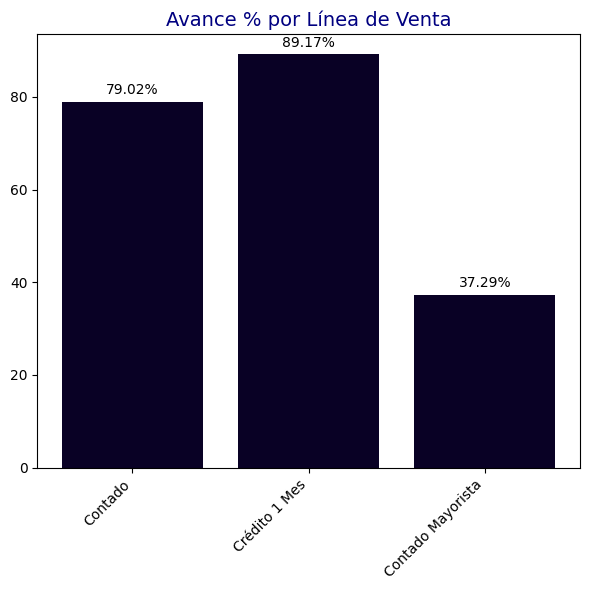

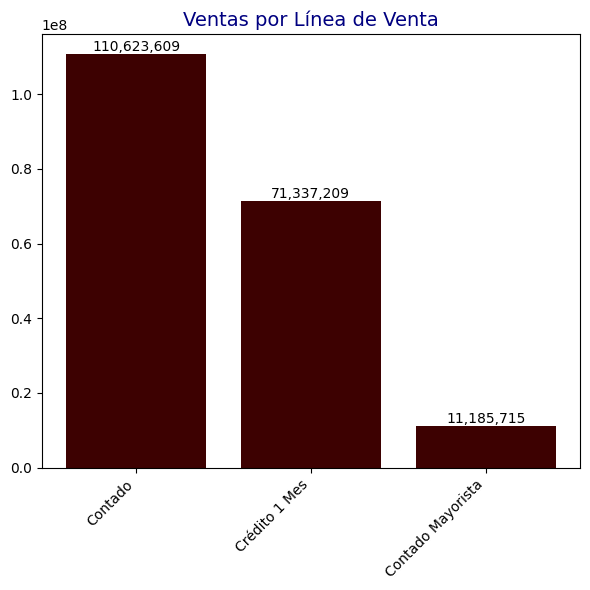

In [ ]:
import os
import pandas as pd
from openai import OpenAI
!pip install reportlab
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib import colors
import matplotlib.pyplot as plt
import io


# ========================
# CONFIGURACIÓN
# ========================
# Reemplaza con tu API key de DeepSeek
client = OpenAI(
    api_key="MI API KEY",
    base_url="https://api.deepseek.com"
)

# ========================
# PREGUNTA PARA LA IA
# ========================
pregunta = (
    "Analiza los datos de ventas y metas, y proporciona un informe ejecutivo detallado. "
    "Identifica con base a Ultima Fecha, teniendo en cuenta los avances (contado, crédito 1 mes, contado mayorista) si cada uno esta muy lejano de la meta respecto al último día del mes (30) o (31); y profundiza generando sugerencias concretas para mejorar el rendimiento."
)

# Solicitud a la IA
response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "Eres un experto en análisis de datos y estrategias comerciales."},
        {"role": "user", "content": f"Datos combinados:\n\n{resumen}"},
        {"role": "user", "content": pregunta},
    ]
)

respuesta_ia= response.choices[0].message.content

import re
from xml.sax.saxutils import escape

def limpiar_texto_ia(texto):
    texto = escape(texto)
    texto = re.sub(r"^#+\s*", "", texto, flags=re.MULTILINE)
    texto = re.sub(r"^\s*[-•]\s*", "&nbsp;&nbsp;&nbsp;&nbsp;• ", texto, flags=re.MULTILINE)
    texto = re.sub(r"^\s*\d+\.\s*", "&nbsp;&nbsp;&nbsp;&nbsp;• ", texto, flags=re.MULTILINE)
    texto = texto.replace("\n", "<br/>")
    return texto


# ========================
# EXPORTAR A PDF
# ========================
output_pdf = "C:/Users/User/Documents/ESP. BIG DATA Y ANALISIS/Proyecto_1/resultado_IA.pdf"

#========
# GRAFICO
#========
import matplotlib.pyplot as plt

def generar_grafico_barras(df, x_col, y_col, titulo, archivo, color="#015A70"):
    plt.figure(figsize=(10, 6))
    plt.bar(df[x_col], df[y_col], color=color)
    plt.title(titulo, fontsize=14, color='navy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(archivo)
    plt.close()

# Top productos mostrando unidades
generar_grafico_barras(top_10_productos, 'Item', 'Cantidad inv.', 'Top 10 Productos', 'grafico_productos.png')


# Top marcas
generar_grafico_barras(top_10_marcas, 'Marca', 'Cantidad inv.', 'Top 10 Marcas', 'grafico_marcas.png')

# Avance por línea
avance_df = pd.DataFrame({
    'Línea': ['Contado', 'Crédito 1 Mes', 'Contado Mayorista'],
    'Avance %': [avance_contado, avance_credito, avance_contado_mayorista]
})
generar_grafico_barras(avance_df, 'Línea', 'Avance %', 'Avance % por Línea de Venta', 'grafico_avance.png', color="#090125")
# agregar porcentaje encima de cada barra
plt.figure(figsize=(6, 6))
bars = plt.bar(avance_df['Línea'], avance_df['Avance %'], color="#090125")
plt.title('Avance % por Línea de Venta', fontsize=14, color='navy')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('grafico_avance.png')

# Ventas por línea
ventas_df = pd.DataFrame({
    'Línea': ['Contado', 'Crédito 1 Mes', 'Contado Mayorista'],
    'Ventas': [ventas_contado, ventas_credito, ventas_contado_mayorista]
})
generar_grafico_barras(ventas_df, 'Línea', 'Ventas', 'Ventas por Línea de Venta', 'grafico_ventas.png', color="#3d0101")
# agregar valor encima de cada barra
plt.figure(figsize=(6, 6))
bars = plt.bar(ventas_df['Línea'], ventas_df['Ventas'], color="#3d0101")
plt.title('Ventas por Línea de Venta', fontsize=14, color='navy')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.savefig('grafico_ventas.png')

styles = getSampleStyleSheet()
styles.add(ParagraphStyle(
    name="TextoGerencial",
    fontSize=11,
    leading=14,
    leftIndent=10,
    textColor=colors.HexColor("#333333"),
    spaceAfter=8,
    fontName="Helvetica"
))

#=========
# CREACION DEL PDF
#=========
styles.add(ParagraphStyle(
    name="Subtitulo",
    fontSize=14,
    leading=18,
    textColor=colors.HexColor("#470000"),
    spaceAfter=10,
    fontName="Helvetica-Bold"
))
# Estilo personalizado: TextoResaltado
styles.add(ParagraphStyle(
    name="TextoResaltado",
    fontSize=11,
    leading=14,
    textColor=colors.darkblue,  # Puedes cambiar a red, orange, etc.
    spaceAfter=10,
    fontName="Helvetica-Bold"
))
doc = SimpleDocTemplate(output_pdf, pagesize=letter)
story = []

story.append(Paragraph("📊 Análisis Comercial", styles["Title"]))
story.append(Spacer(1, 12))
# Insertar gráficos en el PDF
story.append(Paragraph("📊 Visualizaciones", styles["Subtitulo"]))
story.append(Paragraph("Top 10 Productos", styles["TextoResaltado"], bulletText="•"))
story.append(Image("grafico_productos.png", width=480, height=240))
story.append(Spacer(1, 12))

story.append(Paragraph("Top 10 Marcas", styles["TextoResaltado"], bulletText="•"))
story.append(Image("grafico_marcas.png", width=480, height=240))    
story.append(Spacer(1, 12))

story.append(Paragraph("Avance % por Línea de Venta", styles["TextoResaltado"], bulletText="•"))
story.append(Image("grafico_avance.png", width=480, height=240))
story.append(Spacer(1, 12))

story.append(Paragraph("Ventas por Línea de Venta", styles["TextoResaltado"], bulletText="•"))
story.append(Image("grafico_ventas.png", width=480, height=240))
story.append(Spacer(1, 12))

texto_limpio = limpiar_texto_ia(respuesta_ia)
story.append(Paragraph(texto_limpio, styles["TextoGerencial"]))

doc.build(story)

print(f"\n✅ Análisis exportado a: {output_pdf}")

#=========
# ENVIO DE CORREO
#=========

import yagmail
from datetime import datetime
import os

# Configura tu correo institucional
usuario = "nefabiv@gmail.com"
yagmail.register('nefabiv@gmail.com', 'likh aqxj yhdm taim')
yag = yagmail.SMTP(usuario)

# Ruta del archivo PDF
hoy = datetime.today().strftime('%Y-%m-%d')
pdf_path1 = f"C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\resultado_IA.pdf"
#pdf_path2 = f"C:\\Users\\User\\Documents\\ESP. BIG DATA Y ANALISIS\\Proyecto_1\\Ventas_158.pbix" 

# Verifica que el archivo exista
import os
if os.path.exists(pdf_path1): #and os.path.exists(pdf_path2):
    print("Ambos archivos existen.")

    yag.send(
        to=["nefabiv@gmail.com"],#miguelcardoso.aragon@hotmail.com, director158.esp@lagobo.com.co
        subject=f"Dashboard de Ventas - {hoy}",
        contents="Buenos días Miguel,\n\nAdjunto encontrarás el dashboard de ventas actualizado con el análisis realizado por la IA. Por favor, revisa el informe y no dudes en contactarme si tienes alguna pregunta o necesitas información adicional.\n\nSaludos cordiales,\n[Nelson]",
        attachments=[pdf_path1] #pdf_path2]
    )
    print("Correo enviado correctamente.")
else:
    print("Uno o ambos archivos no existen.")

In [8]:
# 📈 Gráfico de Metas vs Cumplimiento
#def generar_grafico():
 #   fig, ax = plt.subplots(figsize=(6, 3.5))

  #  categorias = ['Contado', 'Crédito', 'Contado Mayorista']
   # metas = [
    #    meta.loc[meta['Linea de venta'] == 'CONTADO', 'Meta'].values[0],
     #   meta.loc[meta['Linea de venta'] == 'CREDITO 1 MES', 'Meta'].values[0],
      #  meta.loc[meta['Linea de venta'] == 'CONTADO MAYORISTA', 'Meta'].values[0]
    #]
   # cumplimiento = [ventas_contado, ventas_credito, ventas_contado_mayorista]

    #x = np.arange(len(categorias))
    #ax.bar(x - 0.2, metas, width=0.4, label='Meta', color="#CCCCCC")
    #ax.bar(x + 0.2, cumplimiento, width=0.4, label='Cumplimiento', color="#3399CC")

    #ax.set_xticks(x)
    #ax.set_xticklabels(categorias)
    #ax.set_ylabel("Valor en pesos")
    #ax.set_title("Metas vs Cumplimiento por Línea de Venta")
    #ax.legend()
    #ax.grid(axis='y', linestyle='--', alpha=0.5)

    #buf = io.BytesIO()
   # plt.tight_layout()
   # plt.savefig(buf, format='PNG')
   # plt.close(fig)
   # buf.seek(0)
   # return buf
